In [1]:
# Load the TD3 model and test it on LunarLander-v3

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from TD3 import TD3, ReplayBuffer, flatten_state
import gymnasium as gym
from gymnasium.wrappers import RecordVideo
import matplotlib.pyplot as plt

env_name = "LunarLander-v3"
env = gym.make(env_name, continuous=True, render_mode="rgb_array")
env = RecordVideo(env, video_folder="td3_lunarlander_videos", episode_trigger=lambda x: True)

sample_obs, _ = env.reset()
flat_dim = flatten_state(sample_obs).shape[0]
action_dim = env.action_space.shape[0]
max_action = float(env.action_space.high[0])

# Load the trained agent
agent = TD3(
    state_dim=flat_dim,
    action_dim=action_dim,
    max_action=max_action,
)

# Use absolute path to load the model from the root directory
model_path = "./TD3-models/td3_LunarLander-v3"
agent.load(model_path)

print(f"Loaded TD3 agent from {model_path}")
print(f"State dimension: {flat_dim}")
print(f"Action dimension: {action_dim}")
print(f"Max action: {max_action}\n")

# Evaluate and record video
num_episodes = 100
total_rewards = []

for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    episode_reward = 0
    steps = 0
    
    while not done:
        flat_state = flatten_state(state)
        action = agent.select_action(np.array(flat_state))
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        episode_reward += reward
        steps += 1
    
    total_rewards.append(episode_reward)
    #if (episode + 1) % 10 == 0:
    print(f"Episode {episode + 1}: Reward = {episode_reward:.2f}, Steps = {steps}")

env.close()

# Print statistics
print(f"\n{'='*60}")
print(f"Evaluation complete!")
print(f"Average Reward: {np.mean(total_rewards):.2f}")
print(f"Std Reward: {np.std(total_rewards):.2f}")
print(f"Min Reward: {np.min(total_rewards):.2f}")
print(f"Max Reward: {np.max(total_rewards):.2f}")
print(f"Videos saved to: td3_lunarlander_videos/")
print(f"{'='*60}")

c:\Users\a\anaconda3\envs\ml\Lib\site-packages\gymnasium\wrappers\rendering.py:293: UserWarning: WARN: Overwriting existing videos at c:\Users\a\OneDrive\Desktop\Fall 2025\Reinforcement Learning\assignments\Reinforcement-Learning\Assignment 4 - SOTA model-free algorithms\td3_lunarlander_videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Loaded TD3 agent from ./TD3-models/td3_LunarLander-v3
State dimension: 8
Action dimension: 2
Max action: 1.0

Episode 1: Reward = 225.59, Steps = 451
Episode 1: Reward = 225.59, Steps = 451
Episode 2: Reward = 148.34, Steps = 720
Episode 2: Reward = 148.34, Steps = 720
Episode 3: Reward = -31.40, Steps = 1000
Episode 3: Reward = -31.40, Steps = 1000
Episode 4: Reward = 261.84, Steps = 790
Episode 4: Reward = 261.84, Steps = 790
Episode 5: Reward = 184.55, Steps = 611
Episode 5: Reward = 184.55, Steps = 611
Episode 6: Reward = 232.57, Steps = 352
Episode 6: Reward = 232.57, Steps = 352
Episode 7: Reward = 126.45, Steps = 852
Episode 7: Reward = 126.45, Steps = 852
Episode 8: Reward = 172.89, Steps = 711
Episode 8: Reward = 172.89, Steps = 711
Episode 9: Reward = 237.94, Steps = 401
Episode 9: Reward = 237.94, Steps = 401
Episode 10: Reward = 242.46, Steps = 434
Episode 10: Reward = 242.46, Steps = 434
Episode 11: Reward = 235.14, Steps = 437
Episode 11: Reward = 235.14, Steps = 437
Epis

## Visualize Rewards Over Episodes

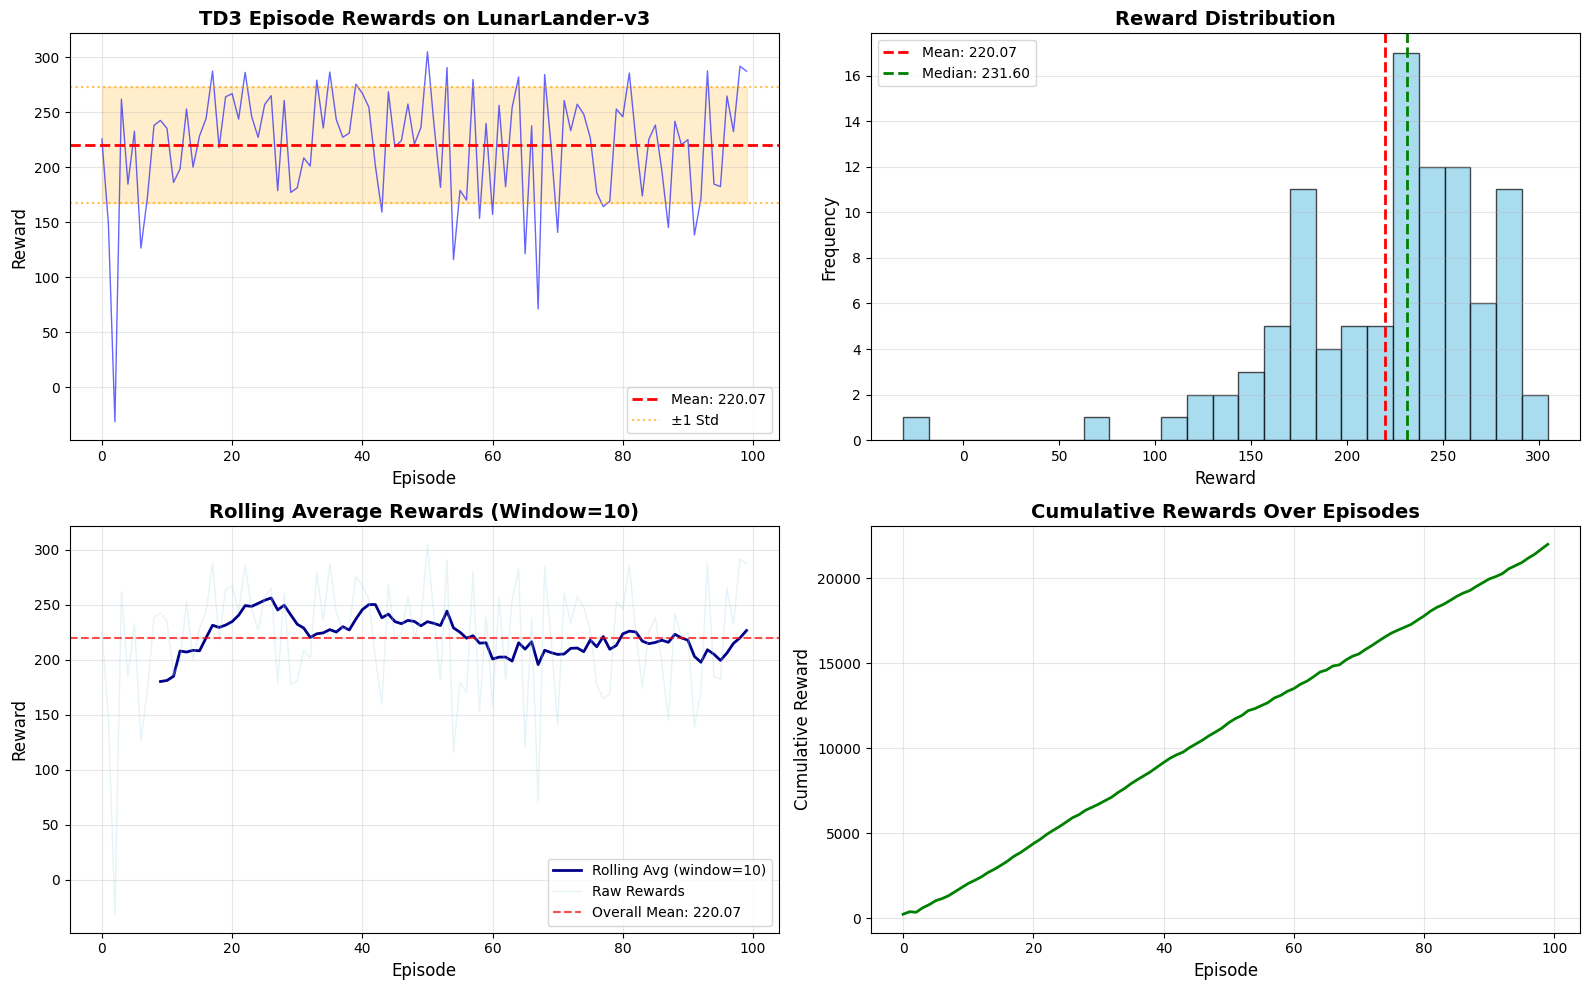


ADDITIONAL STATISTICS
Success rate (reward > 200): 69.0%
Median reward: 231.60
25th percentile: 182.30
75th percentile: 256.98


In [2]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Calculate statistics for plotting
mean_reward = np.mean(total_rewards)
std_reward = np.std(total_rewards)
median_reward = np.median(total_rewards)

# Plot 1: Rewards over episodes
axes[0, 0].plot(total_rewards, alpha=0.6, linewidth=1, color='blue')
axes[0, 0].axhline(y=mean_reward, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_reward:.2f}')
axes[0, 0].axhline(y=mean_reward + std_reward, color='orange', linestyle=':', alpha=0.7, label=f'±1 Std')
axes[0, 0].axhline(y=mean_reward - std_reward, color='orange', linestyle=':', alpha=0.7)
axes[0, 0].fill_between(range(len(total_rewards)), 
                         mean_reward - std_reward, 
                         mean_reward + std_reward, 
                         alpha=0.2, color='orange')
axes[0, 0].set_xlabel('Episode', fontsize=12)
axes[0, 0].set_ylabel('Reward', fontsize=12)
axes[0, 0].set_title('TD3 Episode Rewards on LunarLander-v3', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Reward distribution histogram
axes[0, 1].hist(total_rewards, bins=25, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 1].axvline(x=mean_reward, color='r', linestyle='--', linewidth=2, label=f'Mean: {mean_reward:.2f}')
axes[0, 1].axvline(x=median_reward, color='g', linestyle='--', linewidth=2, label=f'Median: {median_reward:.2f}')
axes[0, 1].set_xlabel('Reward', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('Reward Distribution', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Rolling average (window=10)
window = 10
rolling_avg = np.convolve(total_rewards, np.ones(window)/window, mode='valid')
axes[1, 0].plot(range(window-1, len(total_rewards)), rolling_avg, linewidth=2, color='darkblue', label=f'Rolling Avg (window={window})')
axes[1, 0].plot(total_rewards, alpha=0.3, linewidth=1, color='lightblue', label='Raw Rewards')
axes[1, 0].axhline(y=mean_reward, color='r', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Overall Mean: {mean_reward:.2f}')
axes[1, 0].set_xlabel('Episode', fontsize=12)
axes[1, 0].set_ylabel('Reward', fontsize=12)
axes[1, 0].set_title(f'Rolling Average Rewards (Window={window})', fontsize=14, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Cumulative reward
cumulative_rewards = np.cumsum(total_rewards)
axes[1, 1].plot(cumulative_rewards, linewidth=2, color='green')
axes[1, 1].set_xlabel('Episode', fontsize=12)
axes[1, 1].set_ylabel('Cumulative Reward', fontsize=12)
axes[1, 1].set_title('Cumulative Rewards Over Episodes', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

# Additional statistics
print(f"\n{'='*60}")
print("ADDITIONAL STATISTICS")
print(f"{'='*60}")
print(f"Success rate (reward > 200): {sum(1 for r in total_rewards if r > 200) / len(total_rewards) * 100:.1f}%")
print(f"Median reward: {median_reward:.2f}")
print(f"25th percentile: {np.percentile(total_rewards, 25):.2f}")
print(f"75th percentile: {np.percentile(total_rewards, 75):.2f}")
print(f"{'='*60}")